In [2]:
# Importing libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Loading dataset and printing data information
df = pd.read_csv('dataset.csv')
X = df.drop('class', axis=1)
y = df['class']

# Printing number of samples for each class in dataset
class_counts = df['class'].value_counts()
print(class_counts)

grouped_data = df.groupby('class')
 
# Iterate over each group
for class_label, group in grouped_data:
    print(f"Class {class_label}:")

    # Describe the features for the current class
    description = group.describe()

    # Print the statistical description
    print(description)

class
0    459
1    241
Name: count, dtype: int64
Class 0:
         feature1    feature2    feature3    feature4    feature5    feature6  \
count  459.000000  459.000000  459.000000  459.000000  459.000000  459.000000   
mean     2.956427    1.324619    1.442266    1.363834    2.119826    1.437908   
std      1.672490    0.906830    0.996960    0.995886    0.916145    1.310839   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      1.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
50%      3.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
75%      4.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
max      8.000000    9.000000    8.000000   10.000000   10.000000   10.000000   

         feature7    feature8    feature9  class  
count  459.000000  459.000000  459.000000  459.0  
mean     2.102397    1.289760    1.063181    0.0  
std      1.079976    1.057787    0.501456    0.0  
min    

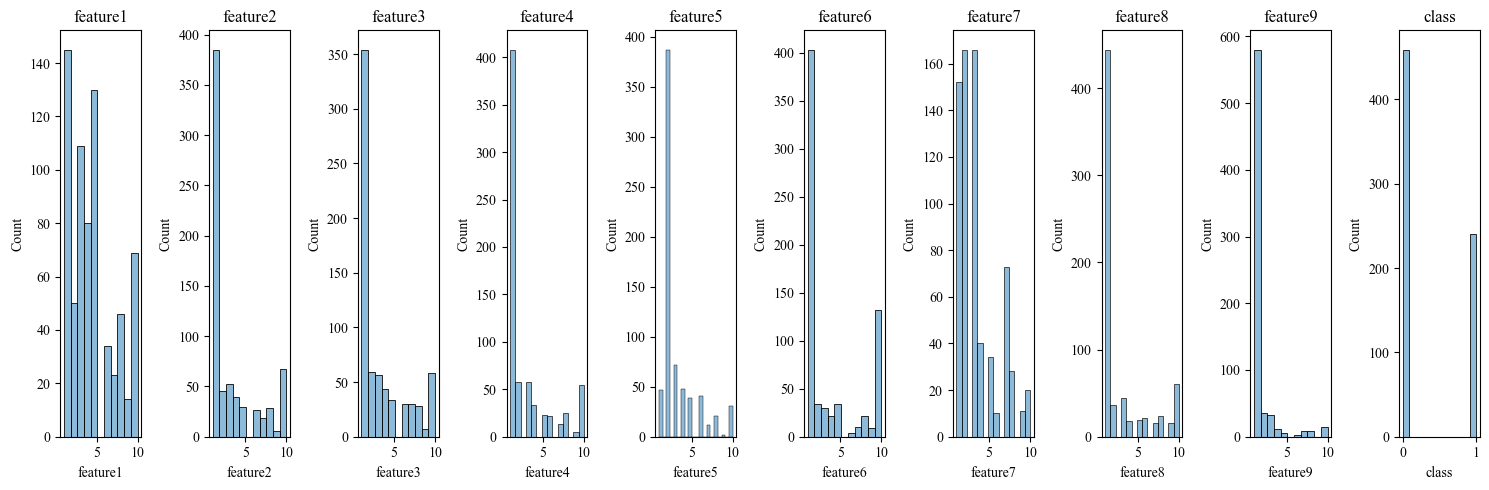

In [4]:
# Plotting a histogram to visualise the distribution of a single numeric variable

# Create subplots
plt.rcParams['font.family'] = 'Times New Roman'
fig, axes = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(15, 5))

# Plot histograms for each feature
for i, col in enumerate(df.columns):
    sns.histplot(df[col], alpha=0.5, ax=axes[i])
    axes[i].set_title(col)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

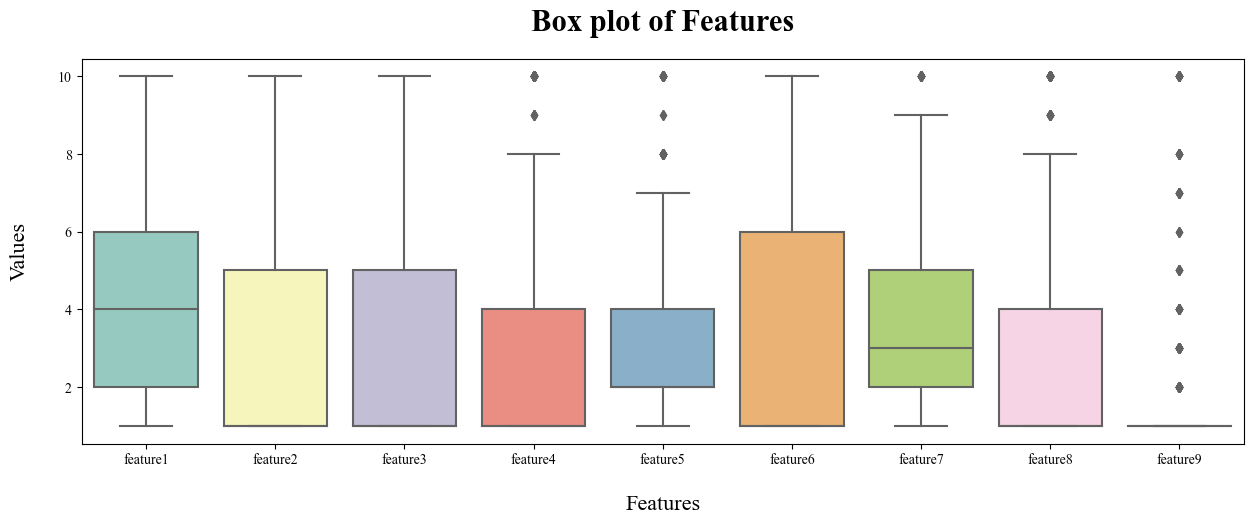

In [5]:
# Plotting a box plot to visualise the distribution of a numeric variable across different levels of categorical variables

plt.figure(figsize=(15, 5))
sns.boxplot(data=X, palette='Set3')

# Add labels and title
plt.xlabel('Features', fontsize='16', labelpad=20)
plt.ylabel('Values', fontsize='16', labelpad=20)
plt.title('Box plot of Features', fontsize='22', fontweight='bold', pad='20')

# Show plot
plt.show()

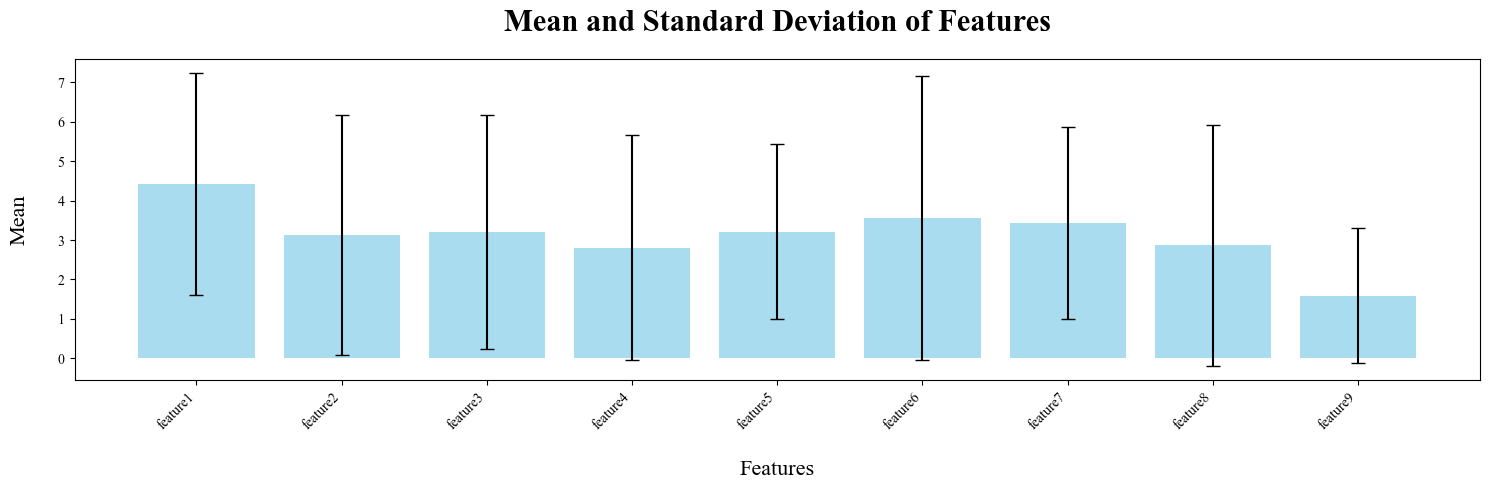

In [6]:
# Plotting a bar plot to visualise the spread or variability of data around mean value
means = X.mean()
stds = X.std()

# Plot the means
plt.figure(figsize=(15, 5))
plt.bar(means.index, means, yerr=stds, capsize=5, color='skyblue', alpha=0.7)

# Add labels and title
plt.xlabel('Features', fontsize='16', labelpad=20)
plt.ylabel('Mean', fontsize='16', labelpad=20)
plt.title('Mean and Standard Deviation of Features', fontsize='22', fontweight='bold', pad='20')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

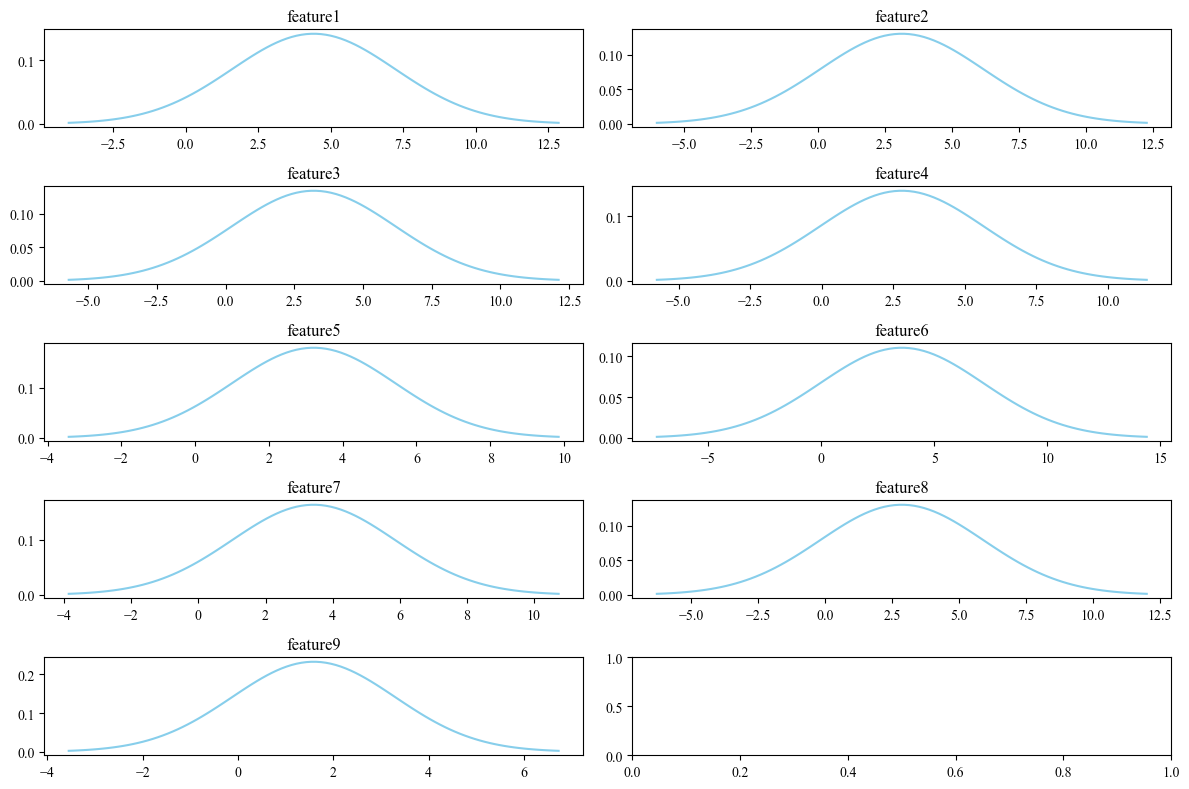

In [7]:
# Plotting bell curve to visualise data distribution and central tendency
from scipy.stats import norm

numeric_columns = X.select_dtypes(include=np.number).columns

# Set the number of subplots
num_plots = len(numeric_columns)
num_rows = int(np.ceil(num_plots / 2))  # Adjust the number of rows as needed

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 8))
axes = axes.flatten()

# Iterate through each feature
for i, col in enumerate(numeric_columns):
    # Calculate the mean and standard deviation of the feature
    mu = X[col].mean()
    sigma = X[col].std()

    # Generate data for a normal distribution (bell curve)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    y = norm.pdf(x, mu, sigma)  # probability density function

    # Plot the bell curve
    axes[i].plot(x, y, color='skyblue')
    axes[i].set_title(col)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18832\1695537120.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], ax=axes[i])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18832\1695537120.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], ax=axes[i])
C:\Users\ASUS\AppData\

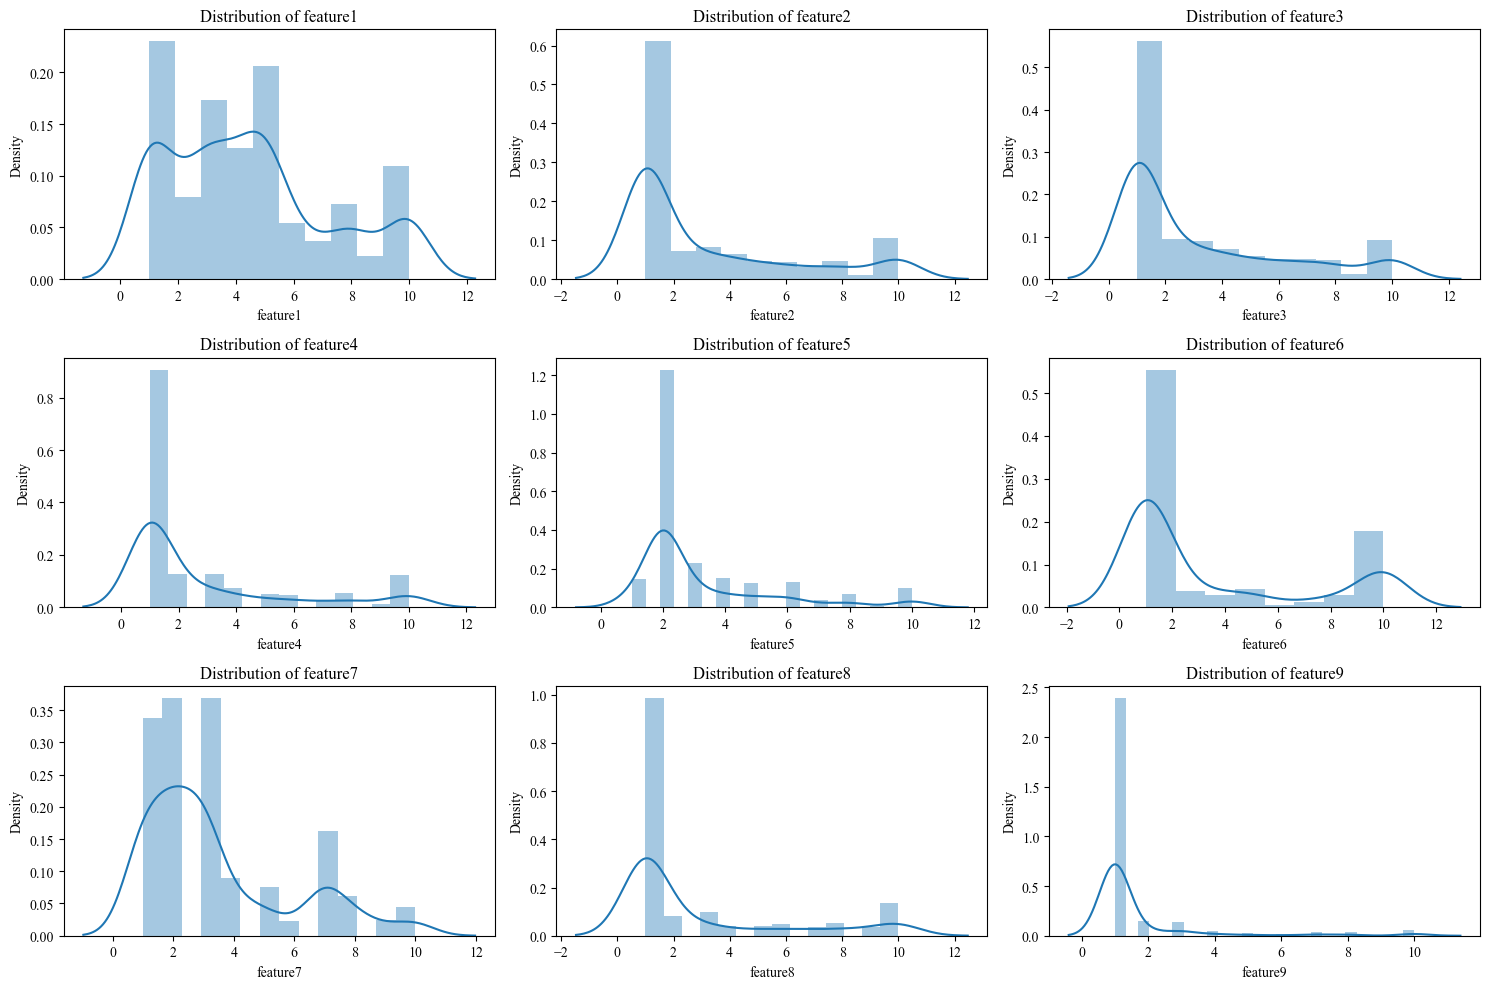

In [8]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through features and create distribution plots
for i, feature in enumerate(numeric_columns):
    sns.distplot(df[feature], ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

# Adjust layout
plt.tight_layout()
plt.show()

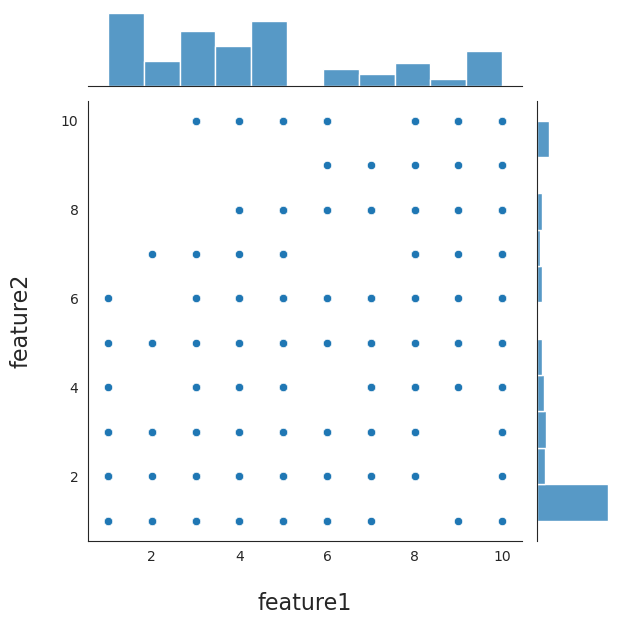

In [11]:
with sns.axes_style('white'):
    sns.jointplot(x="feature1", y="feature2", data=df, kind='scatter')
    plt.xlabel('feature1', fontsize='16', labelpad=20)
    plt.ylabel('feature2', fontsize='16', labelpad=20)
